In [69]:
import numpy as np
import math
from random import *

In [99]:
class Ship:
    
    def __init__(self):
        self.x = None 
        self.y = None
        self.vx = None 
        self.vy = None 
        self.v_theta = (None, None)
        
    def __str__(self):
        return f'{self.x}, {self.y} --> {self.vx}vX, {self.vy}vY == == {self.v_theta}'
    
    def __repr__(self):
        return f'{self.x}, {self.y} --> {self.vx}vX, {self.vy}vY == {self.v_theta}'
        
    def start_coord(self, x, y, vx, vy):
        self.x = x 
        self.y = y
        self.vx, self.vy = vx, vy 
    
    def start_ang(self, x, y, v_theta):
        self.x = x
        self.y = y
        self.v_theta = v_theta 
    
    def compVelocity(self):
        if self.v_theta[0] == None:
            print('Velocity is already in components')
            return
        self.vx = self.v_theta[0]*math.cos(math.radians(self.v_theta[1]))
        self.vy = self.v_theta[0]*math.sin(math.radians(self.v_theta[1]))


def detectCollision(s1, s2, shipLength = 1):
#     xa0: initial x position of point A
# xat: speed in x direction of point A
# ya0: initial y position of point A
# yat: speed in y direction of point A

# xb0 initial x position of point B
# xbt speed in x direction of point B
# yb0 initial y position of point B
# ybt speed in y direction of point B
    #     mintime = 
    #   -(xa0*xat - xat*xb0 - (xa0 - xb0)*xbt + ya0*yat - yat*yb0 - (ya0 - yb0)*ybt) 
    #   /
    #   (xat^2 - 2*xat*xbt + xbt^2 + yat^2 - 2*yat*ybt + ybt^2)
    s1.compVelocity()
    s2.compVelocity()
    

    deno = (s1.vx**2 - 2*s1.vx*s2.vx + s2.vx**2 + s1.vy**2 - 2*s1.vy*s2.vy + s2.vy**2)
    if deno == 0:
        return True, None, None 
    
    
    mintime =   -(s1.x*s1.vx - s1.vx*s2.x - (s1.x - s2.x)*s2.vx + s1.y*s1.vy - s1.vy*s2.y - (s1.y - s2.y)*s2.vy) / deno
  
            
    
    if mintime < 0:
        return True, None, None
    else:
        mindist = math.sqrt(
                  (mintime*s1.vx - mintime*s2.vx + s1.x - s2.x)**2 
                  + 
                  (mintime*s1.vy - mintime*s2.vy + s1.y - s2.y)**2
                )
        #print(f'Position s1:  {s1.x + mintime*s1.vx}, {s1.y + mintime*s1.vy}')
        #print(f'Position s2:  {s2.x + mintime*s2.vx}, {s2.y + mintime*s2.vy}')
        if shipLength > mindist: # collided
            res = False, mintime, mindist
        else:
            res = True, mintime, mindist
        return res



    

In [100]:
# test 1
s1 = Ship()
s1.start_coord(12,101.01,10,0)

s2 = Ship()
s2.start_coord(1000,100,-10,0)

print(s1)
print(s2)
collisionFree, mintime, mindist = detectCollision(s1,s2)
print(collisionFree, mintime, mindist)


12, 101.01 --> 10vX, 0vY == == (None, None)
1000, 100 --> -10vX, 0vY == == (None, None)
Velocity is already in components
Velocity is already in components
True 49.4 1.0100000000000051


In [149]:
max_speed = 40
min_speed  = 25 
par_l2r = 10
par_r2l = 10
inc_l2r = 15
inc_r2l = 15
sep_dist = 5 # min separation between ships
sim_time = 4
max_x = 250 # max range of area
max_y = 250 # max range of area
    
def get_start_loc(pos='left'):
    global max_x, max_y
    start_bound = 10  # inital position spawn
    
    y = randrange(1, max_y)
    if pos == 'right':
        
        x = max_x - uniform(0, start_bound)
        print(x)
    else:
        x = uniform(0, start_bound)
    return x,y
        
        

def get_speed(pos, min_theta, max_theta):
    global max_speed, min_speed
    if min_theta == max_theta:
        theta = min_theta
    else:
        theta = uniform(min_theta, max_theta)
    speed = randrange(min_speed,max_speed)
    assert speed > 0
    if pos == 'right':
        theta = 90 + 90 - theta
   
    return speed, theta



def check_for_collisions(ships, new_ship, sep_dist, sim_time):
    for s in ships:
        collisionFree, mintime, mindist = detectCollision(s,new_ship,sep_dist)
        if not collisionFree:
            if mintime < sim_time:
                return False
            else:
                print(f'Warning: colliding but beyond sim time {mintime}h {sim_time}h {s} <-> {new_ship}')
    return True 
        
def gen_ships(ship_count, pos, theta_low, theta_high, ships):
    global sep_dist, sim_tim
    it_count = 0
    for i in range(ship_count):

        collisionFree = False 
        
        while not collisionFree:
            x,y = get_start_loc(pos)
            v_theta = get_speed(pos, theta_low, theta_high)
            
            new_ship = Ship()
            new_ship.start_ang(x, y, v_theta)
            collisionFree = check_for_collisions(ships, new_ship, sep_dist, sim_time)
            if collisionFree:
                ships.append(new_ship)
            it_count = it_count+1
    print(f'{it_count/ship_count} it for generating {ship_count} ships')
    return ships
    
# # generate few parallel lanes (left to right)

ships = gen_ships(par_l2r, 'left', 0,0, [])
ships = gen_ships(par_r2l, 'right', 0,0, ships)
ships = gen_ships(inc_l2r, 'left', 30, -10, ships)
ships = gen_ships(inc_r2l, 'right', 30, -10, ships)

for s in ships:
    print(s)

1.0 it for generating 10 ships
243.82904058774966
248.24228653424578
248.25020934081687
245.45361674983695
245.4839474682273
242.6476433560191
242.60965163030644
248.15166774729227
245.62293258457296
248.85922091864114
249.37268786460754
248.63049445373133
244.36486132679477
245.54157740916978
1.4 it for generating 10 ships
3.4 it for generating 15 ships
244.41485603997086
241.1721833869029
249.9105193783464
240.50344536264464
246.46269694406644
247.78521997084454
248.78593623620446
248.411148179317
241.1195198829049
245.79851427415744
243.35275539296265
246.05482864792606
240.55473732924875
240.63373817332655
248.9873529271421
244.84771889385783
247.94279255888003
241.41577686977624
241.08922382630115
240.30157089077346
245.40602819706754
249.40697239294926
241.44804402313997
247.47544678359185
249.19187584478112
244.32509422566076
241.91261435603525
243.31582828641533
248.0601003197773
247.261848111846
245.55814156127104
247.36788811583588
243.39558895796614
240.3703104198562
244.411

0 249.5536940886614 0 282.273839390544


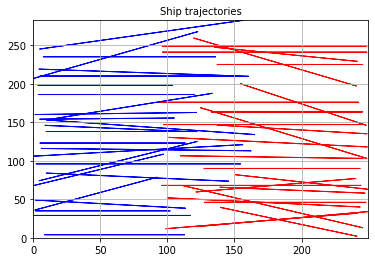

            sid           x           y       end_x       end_y         vx  \
count  50.00000   50.000000   50.000000   50.000000   50.000000  50.000000   
mean   24.50000  125.121652  122.860000  124.112348  133.355342  -0.252326   
std    14.57738  121.874963   71.776584   20.831360   75.164908  31.735824   
min     0.00000    0.417032    2.000000   91.698863    4.000000 -38.000000   
25%    12.25000    4.369105   64.250000  106.015453   69.374946 -30.188109   
50%    24.50000  125.215567  120.500000  121.814561  132.183398  -0.377752   
75%    36.75000  245.602594  173.000000  137.606830  187.052388  29.271056   
max    49.00000  249.553694  249.000000  164.643931  282.273839  38.992703   

                 vy          v       theta        dist  
count  5.000000e+01  50.000000   50.000000   50.000000  
mean   2.623835e+00  31.660000   89.304027  126.640000  
std    5.690353e+00   4.880657   86.459652   19.522629  
min   -5.027817e+00  25.000000   -6.971807  100.000000  
25%    0.000

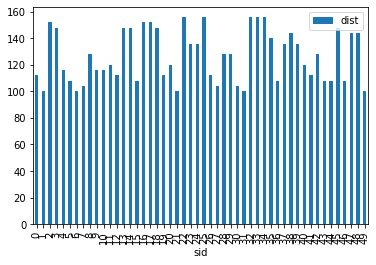

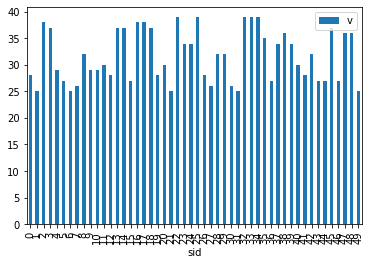

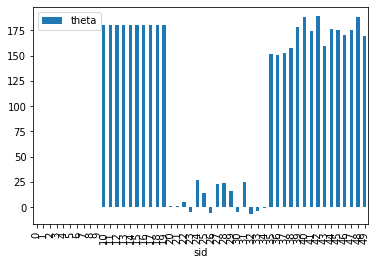

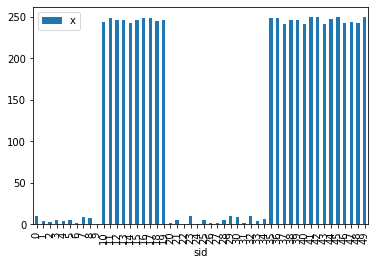

In [150]:
# lets plot
import matplotlib.pyplot as plt
import pandas as pd 
ax = plt.axes()
xmin = 0
xmax = 0
ymin = 0
ymax = 0

rows = []
for i,s in enumerate(ships):
    
    ex = s.vx * sim_time + s.x
    ey = s.vy * sim_time + s.y
    
    if s.x < max_x / 2:
        ec = 'blue'
    else:
        ec = 'red'
    dist = math.sqrt((ex-s.x)**2 + (ey - s.y)**2)
    rows.append([i, s.x, s.y, ex, ey, s.vx, s.vy, s.v_theta[0], s.v_theta[1], dist ])
    
    ax.arrow(s.x, s.y, s.vx * sim_time, s.vy * sim_time, head_width=0.5, head_length=0.7, fc='lightblue', ec=ec)
    xmin = min(xmin, ex, s.x)
    ymin = min(ymin, ey, s.y)
    xmax = max(xmax, ex, s.x)
    ymax = max(ymax, ey, s.y)

plt.grid()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
print(xmin, xmax, ymin, ymax)

plt.title('Ship trajectories',fontsize=10)

# plt.savefig('how_to_plot_a_vector_in_matplotlib_fig1.png', bbox_inches='tight')
plt.show()
df = pd.DataFrame(rows, columns=['sid', 'x', 'y', 'end_x', 'end_y', 'vx', 'vy', 'v', 'theta', 'dist'])
df.plot.bar('sid', 'dist')
df.plot.bar('sid', 'v')
df.plot.bar('sid', 'theta')
df.plot.bar('sid', 'x')
print(df.describe())
# plt.close()

In [108]:
min(1,2,4)

1